In [1]:
import sys
import time
import numpy as np
import pickle

In [2]:
max_size = 21
max_length = 20

In [3]:
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)
# with open("./pkls/ignis_hist_list.pkl", "rb") as f:
#     ignis_hist_list = pickle.load(f)
# with open("./pkls/delta_hist_list.pkl", "rb") as f:
#     delta_hist_list = pickle.load(f)
with open("./pkls/lnp_hist_list.pkl", "rb") as f:
    lnp_hist_list = pickle.load(f)
# with open("./pkls/mooney01_hist_list.pkl", "rb") as f:
#     mooney01_hist_list = pickle.load(f)
# with open("./pkls/nation_hist_list.pkl", "rb") as f:
#     nation_hist_list = pickle.load(f)

In [4]:
sys.path.append("../../libs_bell/")
from lib_graph_states import adjacency_list_for_path_graph, list_to_matrix
F_list = [3 * i + 1 for i in range(max_size // 3)] # subset of focused vertices of graph size max_size
Fs = [F_list[:(n+1) // 3] for n in range(1, max_size + 1)] # subsets of focused vertices of graph size 1 to max_size
adj_lists = [adjacency_list_for_path_graph(n) for n in range(1, max_size + 1)] # adjacency list of graph size 1 to max_size
graphs = [list_to_matrix(adj_list) for adj_list in adj_lists] # adjacency matrix of graph size 1 to max_size
print("max_size:", max_size)
print("F_list:", F_list)

max_size: 21
F_list: [1, 4, 7, 10, 13, 16, 19]


In [5]:
from lib_path_graphs import correlations_of_path_graphs

In [6]:
corr_list, stddev_list, Es_list, Ds_list = correlations_of_path_graphs(adj_lists, Fs, raw_hist_list)

graph size: 1
skipped

graph size: 2
total correlation: 2.6986067391377224 

graph size: 3
total correlation: 5.235283263247862 

graph size: 4
total correlation: 6.196014300584911 

graph size: 5
total correlation: 7.839977383009246 

graph size: 6
total correlation: 10.051412409132213 

graph size: 7
total correlation: 11.006133870373278 

graph size: 8
total correlation: 12.748638080337932 

graph size: 9
total correlation: 15.3215676376632 

graph size: 10
total correlation: 16.19398691634094 

graph size: 11
total correlation: 17.95526418399669 

graph size: 12
total correlation: 20.23747894163491 

graph size: 13
total correlation: 21.068518233972522 

graph size: 14
total correlation: 22.484131200024006 

graph size: 15
total correlation: 24.862675445919574 

graph size: 16
total correlation: 25.660290266184052 

graph size: 17
total correlation: 27.258137773982206 

graph size: 18
total correlation: 29.54311466748444 

graph size: 19
total correlation: 30.297309623708752 

grap

In [7]:
# ignis_corr_list, ignis_stddev_list, ignis_Es_list, ignis_Ds_list = correlations_of_path_graphs(adj_lists, Fs, ignis_hist_list)

In [8]:
# delta_corr_list, delta_stddev_list, delta_Es_list, delta_Ds_list = correlations_of_path_graphs(adj_lists, Fs, delta_hist_list)

In [9]:
lnp_corr_list, lnp_stddev_list, lnp_Es_list, lnp_Ds_list = correlations_of_path_graphs(adj_lists, Fs, lnp_hist_list)

graph size: 1
skipped

graph size: 2
total correlation: 2.818417777827344 

graph size: 3
total correlation: 5.5746801670533115 

graph size: 4
total correlation: 6.647446283331291 

graph size: 5
total correlation: 8.430769417064196 

graph size: 6
total correlation: 10.991644083820727 

graph size: 7
total correlation: 12.122086625839671 

graph size: 8
total correlation: 14.014951976461118 

graph size: 9
total correlation: 16.804177120543834 

graph size: 10
total correlation: 17.812063684415897 

graph size: 11
total correlation: 19.44360244448922 

graph size: 12
total correlation: 22.242906424666927 

graph size: 13
total correlation: 23.267580540874455 

graph size: 14
total correlation: 24.835299024114185 

graph size: 15
total correlation: 27.291359196301734 

graph size: 16
total correlation: 28.31969191033004 

graph size: 17
total correlation: 29.506448192880807 

graph size: 18
total correlation: 31.682546852252187 

graph size: 19
total correlation: 32.39156045554215 

g

In [10]:
# mooney01_corr_list, mooney01_stddev_list, mooney01_Es_list, mooney01_Ds_list = correlations_of_path_graphs(adj_lists, Fs, mooney01_hist_list)

In [11]:
# nation_corr_list, nation_stddev_list, nation_Es_list, nation_Ds_list = correlations_of_path_graphs(adj_lists, Fs, nation_hist_list)

## plot correlations

In [12]:
c_bounds = [0] + [n + (n // 3) for n in range(2, max_size + 1)]
q_bounds = [0]
for n in range(2, max_size + 1):
    q_bounds.append( 2 * (np.sqrt(2) * 2 - 1) * (n // 3) + n - ((n + 1) // 3))
    if (n + 1) % 3 == 0:
        q_bounds[-1] += (np.sqrt(2) * 2 - 1)

In [13]:
from lib_plots import plot_correlations_lines, cut_corrs_list

In [14]:
corrs_list = [np.array(corr_list), 
              # np.array(ignis_corr_list),
              # np.array(delta_corr_list),
              np.array(lnp_corr_list),
              # np.array(mooney01_corr_list),
              # np.array(nation_corr_list),
             ]
stddevs_list = [np.array(stddev_list),
                # np.array(ignis_stddev_list),
                # np.array(delta_stddev_list),
                np.array(lnp_stddev_list),
                # np.array(mooney01_stddev_list),
                # np.array(nation_stddev_list),
               ]

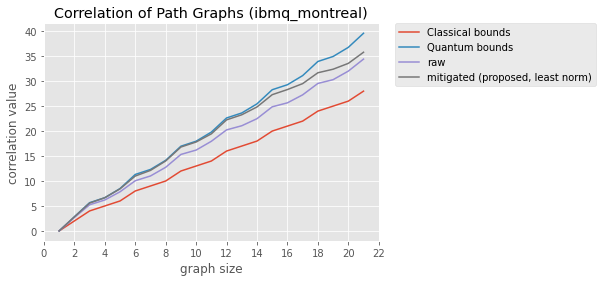

In [15]:
plot_correlations_lines(max_size, 
                        c_bounds, 
                        q_bounds, 
                        corrs_list,
                        stddevs_list,
                        ["raw", 
                         # "mitigated (ignis)", 
                         # "mitigated (proposed, delta)", 
                         "mitigated (proposed, least norm)", 
                         # "mitigated (Mooney et al., threshold = 0.1)",
                         # "mitigated (Nation et al., iterative)",
                        ], 
                        # ["*", "*", "*", "*", "*", "*"], 
                        "Correlation of Path Graphs (ibmq_montreal)")

In [16]:
with open("./pkls/corrs_stddevs_list.pkl", "wb") as f:
    pickle.dump([corrs_list, stddevs_list], f)